# Generate Doc Embedding with yelp comments

In [1]:
import json
import re
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from unicodedata import normalize
from keras.preprocessing import text
from nltk.tokenize import word_tokenize
import multiprocessing
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from keras.preprocessing import text
from yelp_text_preprocessing import *

Using TensorFlow backend.


In [2]:
cores = multiprocessing.cpu_count() -1

In [3]:
json_ratings = get_dataset('clean_ratings.csv')

### Clean comments using custom function
See yelp_text_preprocessing

In [6]:
clean_corpus = list(map(lambda x: clean_text(x['text']), tqdm(json_ratings)))

In [53]:
len(clean_corpus)

497312

In [13]:
def plot_time_steps(lengths):
    #lengths = list(map(lambda x: len(x['sentence_arr']), clean_dataset))
    plt.hist(lengths, bins=500, alpha=0.5, rwidth=1)
    plt.xlim([0, 1000])
    plt.title('Dimensiones temporales')
    plt.show()



In [14]:
lengths = list(map(lambda x: len(str(x['text'])), json_ratings))

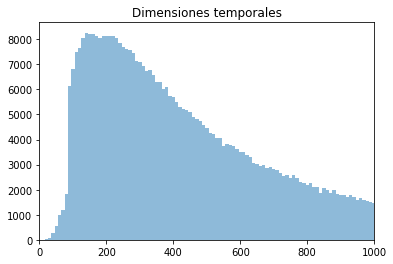

In [15]:
plot_time_steps(lengths)

In [8]:
min_length = 50
max_length = 1000

In [9]:
clean_corpus_trimed = list(filter(lambda x: (len(x) >= min_length and len(x) <= max_length), clean_corpus))

In [10]:
len(clean_corpus_trimed)

350506

### Instance of Doc2Vec with vector size 300, distributed bag of words and training word vectors.

In [21]:
model = Doc2Vec(dm=0, dbow_words=1, workers=cores,vector_size=300)
tagged_train_data = get_tagged_data(clean_corpus_trimed)
model.build_vocab(tagged_train_data)

Default # epochs

In [22]:
model.epochs

5

In [23]:
model.train(tagged_train_data, total_examples=model.corpus_count, epochs=model.epochs)

In [24]:
model.save("doc2vec300.model")

## Train Doc2Vec with sentence

In [4]:
df_raitings = get_dataset('../clean_ratings.csv',as_json=False)

In [8]:
sentences = get_sentence_corpus(df_raitings['text'])

In [9]:
len(sentences)

4030043

In [10]:
sentences_clean_split = get_clean_sentences(sentences,"")

In [12]:
sentences_clean_split[0]

['i', 'really', 'liked', 'this', 'place']

Warning training take a lot of time

In [ ]:
d2v_model = train_doc2vec(sentences_clean_split)

In [ ]:
save_model(d2v_model,'s2v300.model')